In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("pecks_density_data.csv")

In [11]:
df.columns.values

array(['Unnamed: 0', 'density (birds/m^2)', 'pecks'], dtype=object)

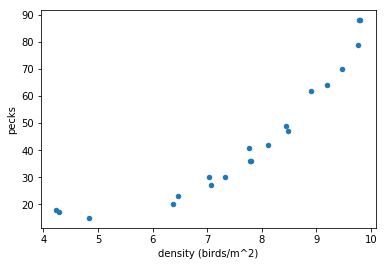

In [28]:
ax = df.plot.scatter(1, 2)
plt.show()

In [84]:
x = np.array(df['density (birds/m^2)'].tolist())
y = np.array(df['pecks'].tolist())

x_ax = np.arange(min(x), max(x), 0.1)

In [44]:
import numpy.polynomial.polynomial as poly

In [69]:
res_lin = poly.polyfit(x, y, 1, full=True)
res_quad = poly.polyfit(x, y, 2, full=True)

In [87]:
y_lin = res_lin[0][1]*x_ax + res_lin[0][0]
y_quad = res_quad[0][2]*x_ax**2 + res_quad[0][1]*x_ax + res_quad[0][0]

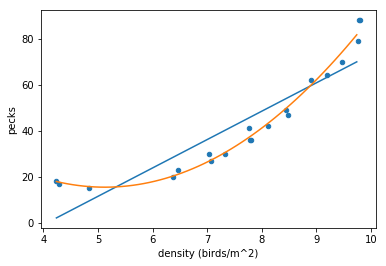

In [89]:
ax = df.plot.scatter(1, 2)
lin = plt.plot(x_ax, y_lin, '-')
quad = plt.plot(x_ax, y_quad, '-')
plt.show()

In [85]:
x_ax

array([ 4.24,  4.34,  4.44,  4.54,  4.64,  4.74,  4.84,  4.94,  5.04,
        5.14,  5.24,  5.34,  5.44,  5.54,  5.64,  5.74,  5.84,  5.94,
        6.04,  6.14,  6.24,  6.34,  6.44,  6.54,  6.64,  6.74,  6.84,
        6.94,  7.04,  7.14,  7.24,  7.34,  7.44,  7.54,  7.64,  7.74,
        7.84,  7.94,  8.04,  8.14,  8.24,  8.34,  8.44,  8.54,  8.64,
        8.74,  8.84,  8.94,  9.04,  9.14,  9.24,  9.34,  9.44,  9.54,
        9.64,  9.74])

In [91]:
from scipy.optimize import minimize

def fun(x, coeff):
    return coeff[0] + coeff[1]*x + coeff[2]*x**2

In [93]:
fun(x_ax, res_quad[0])

array([ 17.89047578,  17.36845577,  16.90872854,  16.51129407,
        16.17615238,  15.90330346,  15.6927473 ,  15.54448392,
        15.45851331,  15.43483547,  15.4734504 ,  15.5743581 ,
        15.73755857,  15.96305181,  16.25083782,  16.60091661,
        17.01328816,  17.48795248,  18.02490958,  18.62415944,
        19.28570208,  20.00953748,  20.79566566,  21.64408661,
        22.55480033,  23.52780682,  24.56310608,  25.66069811,
        26.82058291,  28.04276048,  29.32723082,  30.67399393,
        32.08304982,  33.55439847,  35.0880399 ,  36.68397409,
        38.34220106,  40.06272079,  41.8455333 ,  43.69063858,
        45.59803663,  47.56772744,  49.59971103,  51.69398739,
        53.85055652,  56.06941843,  58.3505731 ,  60.69402054,
        63.09976075,  65.56779374,  68.09811949,  70.69073802,
        73.34564931,  76.06285338,  78.84235022,  81.68413982])

In [95]:
minimize(fun, [0], args=(res_quad[0]))

      fun: 15.434387750064232
 hess_inv: array([[ 0.16053228]])
      jac: array([  1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 5.12801071])